In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Hyperparameters
num_trials = 100_000
eps = 0.1
bandit_prob = [0.2, 0.5, 0.75]  # the win rate for different bandits

In [3]:
# defining class bandit
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0 # num samples collected so far
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (1/self.N)*(x - self.p_estimate)

# define ucb
def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)

In [4]:
# experiment
def run_experiment():
    bandits = [Bandit(p) for p in bandit_prob]
    rewards = np.empty(num_trials)
    total_plays = 0
    
    # initialization: play each bandit once
    for bandit in bandits:
        x = bandit.pull()
        total_plays += 1
        bandit.update(x)
    
    for i in range(num_trials):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
        # plotting
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(num_trials) + 1)
    return cumulative_average

cumulative_average = run_experiment()

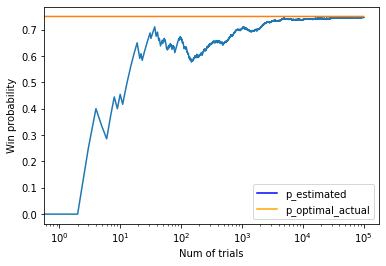

In [5]:
# plot moving average ctr
plt.plot(cumulative_average)
plt.plot(np.ones(num_trials)*np.max(bandit_prob))
plt.xscale('log')
plt.xlabel("Num of trials")
plt.ylabel("Win probability")
blue_line = mlines.Line2D([], [], color='blue', label='p_estimated')
orange_line = mlines.Line2D([], [], color='orange',label='p_optimal_actual')
plt.legend(handles=[blue_line, orange_line])
plt.show();